In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import logging
from nnet_for_hist_dropout_stride import *
from sklearn.metrics import mean_squared_error
from math import sqrt

# Linear regression

In [2]:

if __name__ == "__main__":
    predict_year = 2015
    config = Config()
    logging.basicConfig(filename='train_for_hist_alldata_linear'+str(predict_year)+'.log',level=logging.DEBUG)

    # load data to memory
    filename = 'histogram_all_mean' + '.npz'
    # filename = 'histogram_all_soilweather' + '.npz'
    content = np.load(config.load_path + filename)
    image_all = content['output_image']
    yield_all = content['output_yield']
    year_all = content['output_year']
    locations_all = content['output_locations']
    index_all = content['output_index']

    # keep major counties
    list_keep=[]
    for i in range(image_all.shape[0]):
        if (index_all[i,0]==36)or(index_all[i,0]==42)or(index_all[i,0]==24):
            list_keep.append(i)
    image_all=image_all[list_keep,:]
    yield_all=yield_all[list_keep]
    year_all = year_all[list_keep]
    locations_all = locations_all[list_keep,:]
    index_all = index_all[list_keep,:]

    # split into train and validate
    index_train = np.nonzero(year_all < predict_year)[0]
    index_validate = np.nonzero(year_all == predict_year)[0]
    print('train size',index_train.shape[0])
    print('validate size',index_validate.shape[0])


    image_validate=image_all[index_validate]
    yield_validate=yield_all[index_validate]

    reg = LinearRegression()



('train size', 724)
('validate size', 55)


In [33]:
reg.fit(image_all[index_train], yield_all[index_train])

reg.score(image_all[index_train], yield_all[index_train])

linear_pred = reg.predict(image_validate)

RMSE = sqrt(mean_squared_error(yield_validate, linear_pred))

RMSE

15.84545957058363

# Ramdom Forest

In [3]:
rf = RandomForestRegressor(n_estimators=200, criterion='mse', random_state = 10000)

rf.fit(image_all[index_train], yield_all[index_train])
rf_pred = rf.predict(image_validate)
RMSE_rf = sqrt(mean_squared_error(yield_validate, rf_pred))
RMSE_rf

6.315934141302672

In [5]:
rf_imp = rf.feature_importances_

In [8]:
rf_imp

array([0.00180047, 0.0006097 , 0.00121766, 0.00210895, 0.00167433,
       0.00158928, 0.00162774, 0.00347448, 0.00464312, 0.00061642,
       0.00125186, 0.0009805 , 0.00108479, 0.00185204, 0.00157062,
       0.0011568 , 0.00182988, 0.00196093, 0.00099831, 0.00135892,
       0.00088483, 0.0008259 , 0.00135795, 0.00300193, 0.00236436,
       0.00298939, 0.00217409, 0.00086586, 0.00306622, 0.00066206,
       0.00117424, 0.00152151, 0.00497493, 0.00896114, 0.00179755,
       0.0014165 , 0.00084701, 0.00173481, 0.00097843, 0.0014206 ,
       0.00105168, 0.0008248 , 0.00146935, 0.00226858, 0.00308117,
       0.00085098, 0.00217221, 0.00078939, 0.00064701, 0.00102827,
       0.00114339, 0.00121189, 0.00251147, 0.00614527, 0.00064863,
       0.00170119, 0.00124348, 0.00141953, 0.00121155, 0.00133483,
       0.0008843 , 0.00240895, 0.00445152, 0.00103198, 0.0018326 ,
       0.0011453 , 0.00140274, 0.00123541, 0.00161887, 0.00143135,
       0.00182518, 0.0022906 , 0.00067863, 0.0012154 , 0.00083

# MLP

In [38]:
mlp = MLPRegressor(hidden_layer_sizes = (500,500,500), activation = 'logistic', random_state = 10000)
mlp.fit(image_all[index_train], yield_all[index_train])
mlp_pred = mlp.predict(image_validate)
RMSE_mlp = sqrt(mean_squared_error(yield_validate, mlp_pred))
RMSE_mlp

7.4710167096830515

# Extra Tree

In [9]:
from sklearn.tree import ExtraTreeRegressor

In [10]:
ext = ExtraTreeRegressor()

In [11]:
ext.fit(image_all[index_train], yield_all[index_train])
ext_pred = ext.predict(image_validate)
RMSE_rf = sqrt(mean_squared_error(yield_validate, ext_pred))
RMSE_rf

9.575622457811578

In [12]:
ext_imp = ext.feature_importances_

# Plot Hist for Imp

In [17]:
import matplotlib.pyplot as plt

In [13]:
rf_imp

array([0.00180047, 0.0006097 , 0.00121766, 0.00210895, 0.00167433,
       0.00158928, 0.00162774, 0.00347448, 0.00464312, 0.00061642,
       0.00125186, 0.0009805 , 0.00108479, 0.00185204, 0.00157062,
       0.0011568 , 0.00182988, 0.00196093, 0.00099831, 0.00135892,
       0.00088483, 0.0008259 , 0.00135795, 0.00300193, 0.00236436,
       0.00298939, 0.00217409, 0.00086586, 0.00306622, 0.00066206,
       0.00117424, 0.00152151, 0.00497493, 0.00896114, 0.00179755,
       0.0014165 , 0.00084701, 0.00173481, 0.00097843, 0.0014206 ,
       0.00105168, 0.0008248 , 0.00146935, 0.00226858, 0.00308117,
       0.00085098, 0.00217221, 0.00078939, 0.00064701, 0.00102827,
       0.00114339, 0.00121189, 0.00251147, 0.00614527, 0.00064863,
       0.00170119, 0.00124348, 0.00141953, 0.00121155, 0.00133483,
       0.0008843 , 0.00240895, 0.00445152, 0.00103198, 0.0018326 ,
       0.0011453 , 0.00140274, 0.00123541, 0.00161887, 0.00143135,
       0.00182518, 0.0022906 , 0.00067863, 0.0012154 , 0.00083

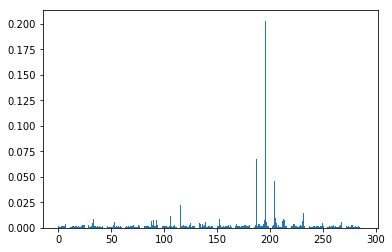

In [41]:
plt.bar(x = [x for x in range(288)],height = rf_imp)
plt.savefig('FeatureImportance.png')